### **Importing Libraries**

In [30]:
!pip install demoji

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import demoji 
demoji.download_codes()
from textblob import TextBlob
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools


### **Importing Datasets**

In [32]:
def remove_URL(sample):
    return re.sub(r"http\S+", "", sample) 

In [33]:
blm_tweets=pd.read_csv("https://raw.githubusercontent.com/DeepanNarayanaMoorthy/What-Does-BLM-Say/master/datasets/blm_tweets.csv", error_bad_lines=False)
blm_news=pd.read_csv("https://raw.githubusercontent.com/DeepanNarayanaMoorthy/What-Does-BLM-Say/master/datasets/blm_news.csv", error_bad_lines=False)

In [34]:
blm_tweets[:10]

,Unnamed: 0,Date,Name,Text,Hashtags
0,0,2020-07-31 23:52:04+00:00,Willimperial,😂 “The Liar Tweets Tonight” #resist #resistanc...,#resist #resistance #DumpTrump2020 #DumpTrump ...
1,1,2020-07-31 23:47:44+00:00,robbystarbuck,Going to go tell BLM protestors I’m Republican...,NaN
2,2,2020-07-31 23:34:25+00:00,DemocracyInn,Wow The @WallOfDocs has joined the Portland pr...,#BlackLivesMatter #BlackLivesMatter #ImpotusAm...
3,3,2020-07-31 23:33:39+00:00,MDconnected,"If our flag is racists, why did they cover Joh...",#BLM
4,4,2020-07-31 23:30:20+00:00,GamingMegaverse,Whether the league does it or not I will. #Kne...,#Kneel4Hockey #BLM
5,5,2020-07-31 22:51:45+00:00,JennaEllisEsq,Well done and well said. “The answer is the Go...,NaN
6,6,2020-07-31 22:44:49+00:00,andreawatkns,Beautiful moment #BLM #SayTheirNames,#BLM #SayTheirNames
7,7,2020-07-31 22:37:45+00:00,MatteaMerta,The CBC was willing to cover BLM day and night...,#DefundTheCBC
8,8,2020-07-31 22:30:32+00:00,BlaqRosebudClub,Good for Orlando Magic's player Jonathan Issac...,NaN
9,9,2020-07-31 22:09:17+00:00,Paul52228396,#BLM = Burn Loot Murder. Thanks Jim Jordan!😏,#BLM


In [35]:
blm_news["Text"]=[remove_URL(i) for i in blm_news["Text"]]
blm_news.drop_duplicates(subset ="Text", 
                     keep = False, inplace = True)
blm_news.reset_index(drop=True, inplace=True)
blm_news.shape
blm_news[:15]

,Unnamed: 0,Date,Name,Text,Hashtags
0,0,2020-06-10 17:42:40+00:00,BBCNews,Reni Eddo-Lodge breaks book chart record amid ...,NaN
1,1,2020-07-25 13:59:02+00:00,TheEconomist,They are planning BLM style protests in Westmi...,NaN
2,2,2020-06-20 11:28:01+00:00,TheEconomist,Many young activists ignored BLM UK’s advice n...,NaN
3,3,2020-05-25 16:00:13+00:00,TheEconomist,“The general public has become a bit exhausted...,NaN
4,9,2020-06-11 09:29:11+00:00,Reuters,Motor racing: McLaren's Norris loses followers...,NaN
5,10,2020-07-29 20:59:30+00:00,guardian,"Guardian front page, Thursday 30 July 2020: Yo...",NaN
6,11,2020-07-29 10:25:43+00:00,guardian,‘I want to stand up to Trump’: Portland protes...,NaN
7,12,2020-07-23 21:43:37+00:00,guardian,NSW police chief undermined legal challenge to...,NaN
8,13,2020-07-22 18:55:37+00:00,guardian,'Wall of Moms' protect Portland's BLM proteste...,NaN
9,14,2020-07-11 19:56:50+00:00,guardian,Thousands march through Brighton to support BL...,NaN


### **Extracting Emojis**

In [36]:
emojis=[demoji.findall(str(text)) for text in list(blm_tweets["Text"])]
emojis=[' '.join(list(i.values())) for i in emojis]
blm_tweets["Emojis"]=emojis
blm_tweets[:10]

,Unnamed: 0,Date,Name,Text,Hashtags,Emojis
0,0,2020-07-31 23:52:04+00:00,Willimperial,😂 “The Liar Tweets Tonight” #resist #resistanc...,#resist #resistance #DumpTrump2020 #DumpTrump ...,face with tears of joy
1,1,2020-07-31 23:47:44+00:00,robbystarbuck,Going to go tell BLM protestors I’m Republican...,NaN,
2,2,2020-07-31 23:34:25+00:00,DemocracyInn,Wow The @WallOfDocs has joined the Portland pr...,#BlackLivesMatter #BlackLivesMatter #ImpotusAm...,
3,3,2020-07-31 23:33:39+00:00,MDconnected,"If our flag is racists, why did they cover Joh...",#BLM,
4,4,2020-07-31 23:30:20+00:00,GamingMegaverse,Whether the league does it or not I will. #Kne...,#Kneel4Hockey #BLM,
5,5,2020-07-31 22:51:45+00:00,JennaEllisEsq,Well done and well said. “The answer is the Go...,NaN,
6,6,2020-07-31 22:44:49+00:00,andreawatkns,Beautiful moment #BLM #SayTheirNames,#BLM #SayTheirNames,
7,7,2020-07-31 22:37:45+00:00,MatteaMerta,The CBC was willing to cover BLM day and night...,#DefundTheCBC,
8,8,2020-07-31 22:30:32+00:00,BlaqRosebudClub,Good for Orlando Magic's player Jonathan Issac...,NaN,
9,9,2020-07-31 22:09:17+00:00,Paul52228396,#BLM = Burn Loot Murder. Thanks Jim Jordan!😏,#BLM,smirking face


### **Cluster Identification on BLM Tweets**

In [37]:
blm_texts=[str(i) for i in blm_tweets["Text"]]
blm_texts=[remove_URL(i) for i in blm_texts]
blm_texts[:15]

['😂 “The Liar Tweets Tonight” #resist #resistance #DumpTrump2020 #DumpTrump #Biden2020 #RidinWithBiden #blm #bluewave #TrumpIsNotWell #COVID19 #maga',
 'Going to go tell BLM protestors I’m Republican and ask what they think about Republicans. ',
 'Wow The @WallOfDocs has joined the Portland protests in support of the #BlackLivesMatter movement! Retweet if you Support BLM #ImpotusAmericanas',
 'If our flag is racists, why did they cover John Lewis’ casket with one? #BLM. @NBA',
 'Whether the league does it or not I will. #Kneel4Hockey #BLM ',
 'Well done and well said. “The answer is the Gospel.”',
 'Beautiful moment #BLM #SayTheirNames',
 "The CBC was willing to cover BLM day and night yet they didn't even bother showing up to Toronto's march against child sex trafficking... #DefundTheCBC",
 "Good for Orlando Magic's player Jonathan Issac for STANDING during the National Anthem & REFUSING to wear a BLM t-shirt over his jersey! More should be like this @NBA player!",
 '#BLM = Burn Loot 

In [38]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(blm_texts)

In [39]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [41]:
for i in range(true_k):
 print('Cluster' + str(i))
 print("--------")
 for ind in order_centroids[i, :10]:
   print('\b'+ str(terms[ind])   +',') 
 print("======================")

Cluster0
--------
justiceforgeorgefloyd,
blacklivesmatter,
justiceforbreonnataylor,
people,
today,
protest,
break,
just,
don,
chain,
Cluster1
--------
matter,
lives,
black,
blm,
blacklivesmatter,
movement,
people,
protest,
white,
justiceforgeorgefloyd,
Cluster2
--------
racism,
blacklivesmatter,
taketheknee,
justiceforgeorgefloyd,
6pm,
antiracismday,
icantbreathe,
wedemandchange,
georgefloyd,
june,
Cluster3
--------
love,
ivehadenough,
justiceforbreonnataylor,
justiceforgeorgefloyd,
time,
twin,
righteous,
blacklivesmatter,
won,
let,
Cluster4
--------
blm,
antifa,
black,
people,
white,
trump,
don,
support,
like,
just,
Cluster5
--------
twitter,
pic,
com,
fuck,
blm,
shit,
blacklivesmatter,
people,
black,
icantbreathe,
Cluster6
--------
icantbreathe,
georgefloyd,
blacklivesmatter,
breathe,
people,
trump,
protest,
blacklivesmattter,
black,
amp,
Cluster7
--------
police,
brutality,
icantbreathe,
blacklivesmatter,
jus

In [42]:
X = vectorizer.transform(blm_texts)
predicted = model.predict(X)
predicted=list(predicted)
predicted[:10]

[4, 4, 4, 4, 4, 0, 4, 4, 4, 4]

In [43]:
cluster_percentages=[predicted.count(i) for i in list(set(predicted))]

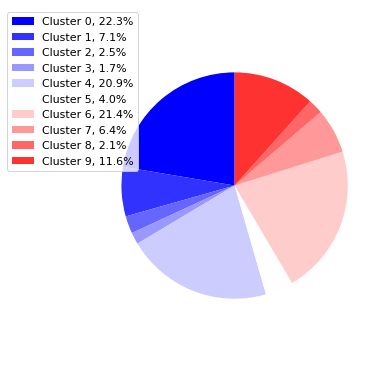

In [44]:
sizes = cluster_percentages
labels = ["Cluster "+str(i) for i in list(set(predicted))]
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

### **Cluster Identification on BLM News Tweets**

#### **Cluster Identification for All news network**

In [45]:
blm_news_new=pd.DataFrame()
blm_news_new["Name"]=blm_news['Name']
blm_news_new["Text"]=blm_news['Text']
blm_news_new[:5]

,Name,Text
0,BBCNews,Reni Eddo-Lodge breaks book chart record amid ...
1,TheEconomist,They are planning BLM style protests in Westmi...
2,TheEconomist,Many young activists ignored BLM UK’s advice n...
3,TheEconomist,“The general public has become a bit exhausted...
4,Reuters,Motor racing: McLaren's Norris loses followers...


In [46]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(list(blm_news_new["Text"]))

In [47]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [49]:
for i in range(true_k):
 print('Cluster' + str(i))
 print("--------")
 for ind in order_centroids[i, :10]:
   print('\b'+ str(terms[ind])   +',') 
 print("======================")

Cluster0
--------
protests,
floyd,
george,
trump,
death,
blm,
president,
amid,
violence,
following,
Cluster1
--------
officer,
murder,
chauvin,
police,
derek,
minneapolis,
neck,
charged,
floyd,
knee,
Cluster2
--------
officers,
police,
involved,
death,
minneapolis,
floyd,
george,
gas,
tear,
charged,
Cluster3
--------
lives,
matter,
black,
protest,
protests,
protesters,
police,
london,
people,
support,
Cluster4
--------
live,
houston,
floyd,
funeral,
george,
memorial,
service,
updates,
msnbc,
al,
Cluster5
--------
movement,
lives,
matter,
black,
support,
players,
league,
bts,
soccer,
took,
Cluster6
--------
york,
new,
city,
police,
tower,
mural,
floyd,
george,
death,
matter,
Cluster7
--------
floyd,
death,
george,
people,
police,
brother,
says,
racism,
minneapolis,
protest,
Cluster8
--------
killing,
floyd,
george,
police,
protests,
cities,
minneapolis,
death,
brutality,
curfews,
Cluster9
--------


In [50]:
X = vectorizer.transform(list(blm_news_new["Text"]))
predicted = model.predict(X)
predicted=list(predicted)
predicted[:10]
len(predicted)

2256

In [51]:
cluster_percentages=[predicted.count(i) for i in list(set(predicted))]

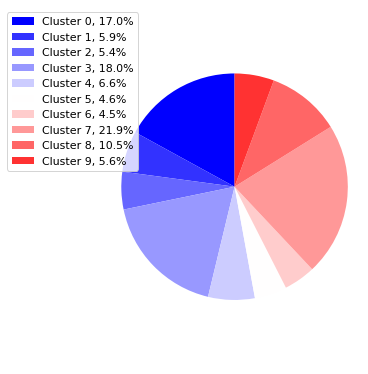

In [52]:
sizes = cluster_percentages
labels = ["Cluster "+str(i) for i in list(set(predicted))]
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

#### **Cluster Identification for individual news network**

In [53]:
list(blm_news_new.Name.unique())

['BBCNews',
 'TheEconomist',
 'Reuters',
 'guardian',
 'realDailyWire',
 'CNN',
 'MSNBC',
 'BlazeTV',
 'freespeechtv',
 'nytimes',
 'BBCWorld',
 'WSJ',
 'FinancialTimes',
 'BBCBreaking']

In [54]:
print(blm_news_new[blm_news_new['Name']=='BBCNews'].index.values)

[  0 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 791 792 793 794
 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809 810 811 812
 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830
 831 832 833]


In [55]:
bbc_pred = [predicted[i] for i in blm_news_new[blm_news_new['Name']=='BBCNews'].index.values] 
bbc_pred=list(np.unique(bbc_pred, return_counts=True))


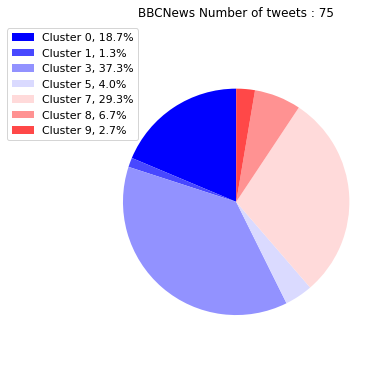

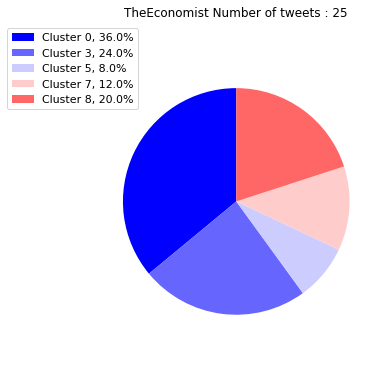

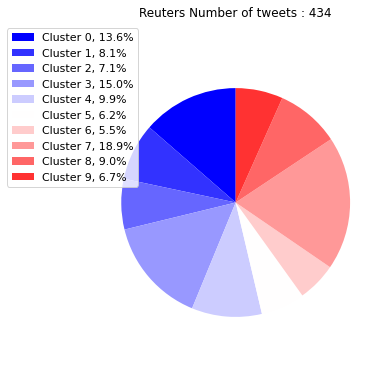

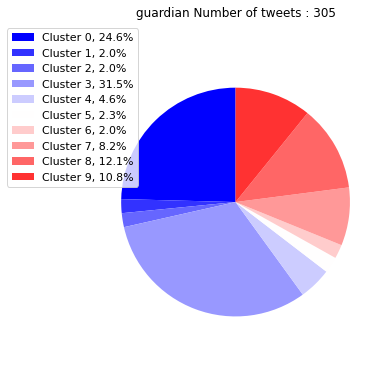

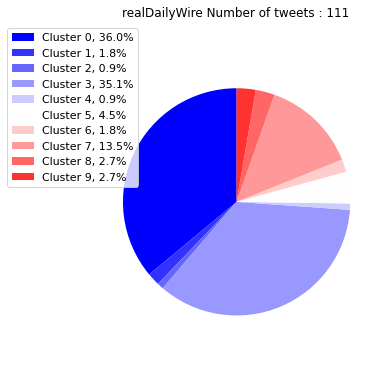

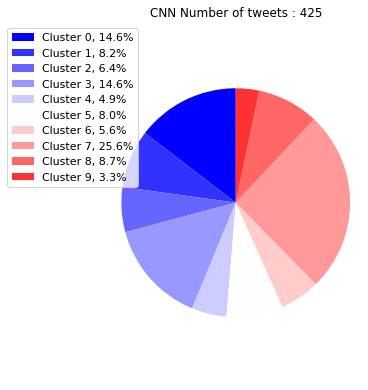

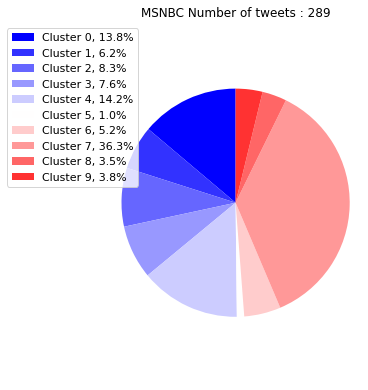

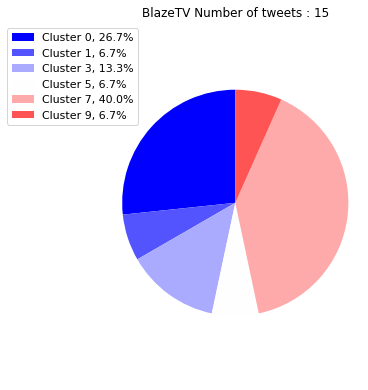

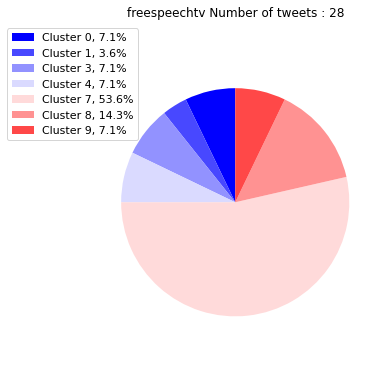

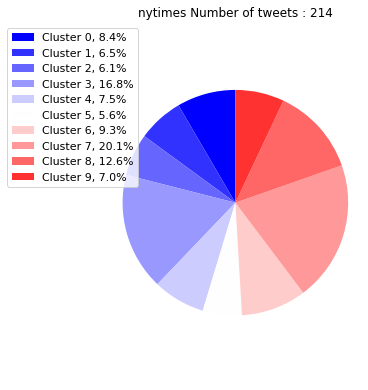

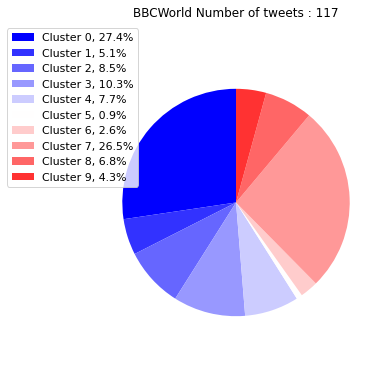

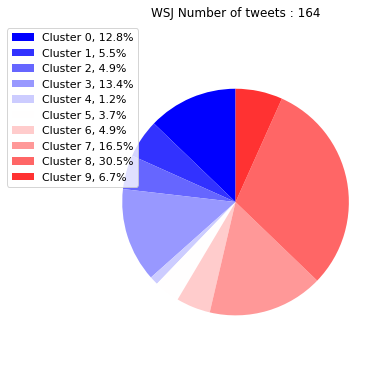

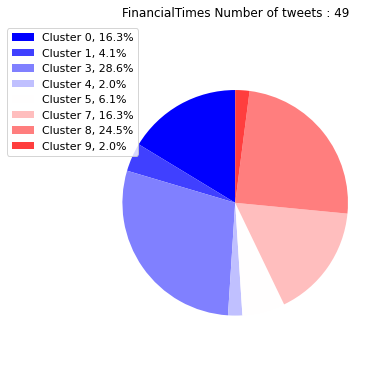

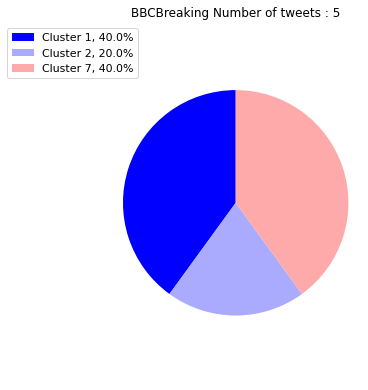

In [56]:
for i in list(blm_news_new.Name.unique()):
  news_pred = [predicted[j] for j in blm_news_new[blm_news_new['Name']==i].index.values] 
  news_pred=list(np.unique(news_pred, return_counts=True))
  sizes = list(news_pred[1])
  labels = ["Cluster "+str(k) for k in list(news_pred[0])]
  fig1, ax1 = plt.subplots(figsize=(5, 5))
  fig1.subplots_adjust(0.3, 0, 1, 1)
  theme = plt.get_cmap('bwr')
  ax1.set_prop_cycle("color", [theme(1. * l / len(sizes))
                              for l in range(len(sizes))])
  _, _ = ax1.pie(sizes, startangle=90, radius=1800)
  ax1.axis('equal')
  total = sum(sizes)
  plt.legend(
      loc='upper left',
      labels=['%s, %1.1f%%' % (
          m, (float(n) / total) * 100)
              for m, n in zip(labels, sizes)],
      prop={'size': 11},
      bbox_to_anchor=(0.0, 1),
      bbox_transform=fig1.transFigure
  )
  plt.title(i +" Number of tweets : " + str(len(blm_news_new[blm_news_new['Name']==i].index.values)))
  plt.show()

### **Sentiment Analysis based on Emojis**

In [57]:
blm_tweets_emojis=blm_tweets[blm_tweets["Emojis"]!=blm_tweets["Emojis"][1]]
blm_tweets_emojis.reset_index(drop=True, inplace=True)
blm_tweets_emojis

,Unnamed: 0,Date,Name,Text,Hashtags,Emojis
0,0,2020-07-31 23:52:04+00:00,Willimperial,😂 “The Liar Tweets Tonight” #resist #resistanc...,#resist #resistance #DumpTrump2020 #DumpTrump ...,face with tears of joy
1,9,2020-07-31 22:09:17+00:00,Paul52228396,#BLM = Burn Loot Murder. Thanks Jim Jordan!😏,#BLM,smirking face
2,19,2020-07-31 23:36:12+00:00,BossBigmamma,I said what I said. If you won’t reach out to ...,#alm #blm #BlackLivesMatter #BlackLivesMatter ...,peach
3,35,2020-07-31 20:36:57+00:00,gradydoctor,"I’m so sorry, babygirl. 💙 #JusticeForBreonnaTa...",#JusticeForBreonnaTaylor #BLM,blue heart
4,39,2020-07-31 23:24:54+00:00,RayDaltonXXX,#BLM keep the intensity of the rallies-NOW is ...,#BLM,heart suit
...,...,...,...,...,...,...
819,4721,2020-07-27 20:19:22+00:00,DamilareDamson,Another George Floyd in Nigeria 😂,NaN,face with tears of joy
820,4724,2020-07-27 13:53:26+00:00,AmieNicoleLICSW,🤬🤬🤬 apparently they haven’t been listening to ...,#BlackLivesMatter #BlackLivesMatter,face with symbols on mouth
821,4738,2020-07-26 08:08:52+00:00,Texasgirl792,Correct me if I’m wrong but I didn’t hear Geor...,NaN,thinking face
822,4740,2020-07-26 14:55:12+00:00,JfkJrQReturn,Called out Oprah....George Floyd happened..🤔,NaN,thinking face


In [72]:
polarities = [TextBlob(text).sentiment.polarity for text in blm_tweets_emojis['Emojis']]
pd.DataFrame(polarities,columns=["pol"]).describe()
df = pd.DataFrame(polarities,columns=["pol"])
fig = px.histogram(df, x="pol")
fig.update_layout(title_text='Sentiment Analysis Histogram based on Emojis Used' )
fig.write_html("sentiment_histogram_emoji.html")
fig.show()

### **Sentiment Analysis on News Channel Tweets**

In [64]:
blm_news_new[:10]

,Name,Text
0,BBCNews,Reni Eddo-Lodge breaks book chart record amid ...
1,TheEconomist,They are planning BLM style protests in Westmi...
2,TheEconomist,Many young activists ignored BLM UK’s advice n...
3,TheEconomist,“The general public has become a bit exhausted...
4,Reuters,Motor racing: McLaren's Norris loses followers...
5,guardian,"Guardian front page, Thursday 30 July 2020: Yo..."
6,guardian,‘I want to stand up to Trump’: Portland protes...
7,guardian,NSW police chief undermined legal challenge to...
8,guardian,'Wall of Moms' protect Portland's BLM proteste...
9,guardian,Thousands march through Brighton to support BL...


In [70]:
list(blm_news_new[blm_news_new['Name']=='guardian']['Text'])[:10]

['Guardian front page, Thursday 30 July 2020: Young, British and Black – voices of the BLM generation ',
 '‘I want to stand up to Trump’: Portland protesters unleash fury over BLM, Covid-19 and economy ',
 'NSW police chief undermined legal challenge to BLM protest planned for Sydney, organisers say ',
 "'Wall of Moms' protect Portland's BLM protesters – video ",
 'Thousands march through Brighton to support BLM movement ',
 'Police tell woman to cover up anti-Boris Johnson T-shirt during BLM protest – video ',
 'Australian journalist tells US inquiry she was beaten by police at BLM protest ',
 'Beyoncé and Alicia Keys pay tribute to BLM movement at 2020 BET Awards – video highlights ',
 'BLM protests prompt Edinburgh to reassess fate of golliwog mural ',
 'Dean Smith says he fully supports Tyrone Mings going on BLM march ']

In [88]:
news_list=list(blm_news_new.Name.unique())
polarities=[]
for i in news_list:
  x=[TextBlob(text).sentiment.polarity for text in list(blm_news_new[blm_news_new['Name']==i]['Text'])] 
  polarities.append(x)
len(news_list)


14

In [116]:
fig = make_subplots(rows=2, cols=7,subplot_titles=news_list)
traces=[]
for i in news_list:
  trace = go.Histogram(x=polarities[news_list.index(i)],name=i)
  traces.append(trace)
fig.append_trace(traces[0], 1, 1)
fig.append_trace(traces[1], 1, 2)
fig.append_trace(traces[2], 1, 3)
fig.append_trace(traces[3], 1, 4)
fig.append_trace(traces[4], 1, 5)
fig.append_trace(traces[5], 1, 6)
fig.append_trace(traces[6], 1,7)
fig.append_trace(traces[7], 2,1)
fig.append_trace(traces[8], 2,2)
fig.append_trace(traces[9], 2,3)
fig.append_trace(traces[10], 2,4)
fig.append_trace(traces[11], 2,5)
fig.append_trace(traces[12], 2,6)
fig.append_trace(traces[13], 2,7)
fig.update_layout( title_text="Individual Sentiment Score for News Channel Tweets")
fig.write_html("news_tweet_sent_analysis.html")
fig.show()